In [4]:
pip install scikit-learn


<ipython-input-11-f312b2c60c24>:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Mean Squared Error: 279.0542066783865
R-squared (R2) Score: 0.044039737129735634
Cross-Validation Scores: [0.07136336 0.02845143 0.06971736 0.04785847 0.06261698]
Mean Cross-Validation Score: 0.056001518781341984
Coefficients: [ 1.10929915e+01 -9.40834395e+00 -5.51675355e-02  4.42622948e-01
  1.25405673e+00 -4.39738098e-01 -9.76040189e+00 -5.35510716e+00
 -6.86090308e+00 -1.40785039e-01 -4.79539891e-03  1.02905380e+00]
Intercept: 49.422212726643444


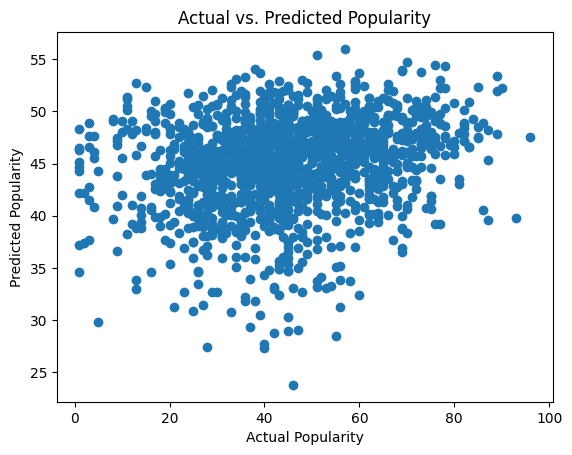

['linear_regression_model.pkl']

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load the dataset
data = pd.read_csv('test.csv')

# Define the feature columns (independent variables)
feature_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]

# Define the target column (dependent variable)
target_column = 'Popularity'

# Handle missing data (replace NaN with the mean)
data = data.fillna(data.mean())

# Convert non-numeric columns to numeric (if needed)
data = pd.get_dummies(data, columns=['Artist Name', 'Track Name'])

# Split the dataset into training and testing sets
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

# You can also access the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs. Predicted Popularity")
plt.show()

# Save the trained model for future use
joblib.dump(model, 'linear_regression_model.pkl')
